In [3]:
import sys
sys.path.append('../../')

import pickle
import matplotlib.pyplot as plt

In [4]:
from plants_and_TCR.analyze_data import grab_cmip_dataset
from plants_and_TCR.analysis_parameters import directory_information
from plants_and_TCR.process_data import area_weighting

In [5]:
DIR_CMIP_DICTS = directory_information.DIR_DATA_DICTIONARIES
CDICT = pickle.load(open(DIR_CMIP_DICTS+'cmip_dict.pickle', "rb"))

In [7]:
ds=grab_cmip_dataset.grab_cmip_dataset(CDICT, 'CESM2','1pctCO2','clt')
ds['clt']

<xarray.DataArray 'clt' (time: 1800, lat: 192, lon: 288)>
dask.array<concatenate, shape=(1800, 192, 288), dtype=float32, chunksize=(600, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * time     (time) object 0001-01-15 12:00:00 ... 0150-12-15 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        for the whole atmospheric column, as seen from the surfac...
    description:    for the whole atmospheric column, as seen from the surfac...
    frequency:      mon
    id:             clt
    long_name:      Total Cloud Cover Percentage
    mipTable:       Amon
    out_name:       clt
    prov:           Amon ((isd.003))
    realm:          atmos
    standard_name:  cloud_area_fraction
    time:           time
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Total Cloud Cover Percentage
    type:           real
    units:          %
    variable_id:    clt

In [103]:
modelname = 'NorESM2-LM'
ds_FULL = grab_cmip_dataset.grab_cmip_dataset(CDICT, modelname,'1pctCO2','tas')
ds_RAD = grab_cmip_dataset.grab_cmip_dataset(CDICT, modelname,'1pctCO2-rad','tas')
ds_PI = grab_cmip_dataset.grab_cmip_dataset(CDICT, modelname,'piControl','tas')

In [104]:
average_type='global'
ds_FULL_global = area_weighting.get_global_mean_timeseries(ds_FULL, modelname, average_type)
ds_PI_global = area_weighting.get_global_mean_timeseries(ds_PI, modelname, average_type)

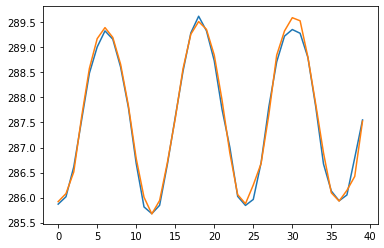

In [106]:
import numpy as np
plt.plot(np.arange(0,40),ds_PI_global[0:40])
plt.plot(np.arange(0,40),ds_FULL_global[0:40])